In [88]:
import pandas as pd

In [89]:
url = "https://raw.githubusercontent.com/alooperalta/movieRecommendation/master/content/ml-latest-small/movies.csv"

In [90]:
movie = pd.read_csv(url)

In [91]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [92]:
#### converting to string

In [93]:
genre= movie["genres"].str.get_dummies(sep = "|")

In [94]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [95]:
movie = pd.concat([movie,genre], axis = 1)

In [96]:
movie.drop(["genres","(no genres listed)"],axis = 1, inplace = True)

In [97]:
#checking list of action moviesusing iloc
ation = movie.loc[movie["Action"] ==1]

In [98]:
len(ation)

1828

In [99]:
from sklearn.cluster import KMeans

In [100]:
x =movie.drop(["title"], axis = 1)

In [101]:
recconmender = KMeans(n_clusters = 180, random_state = 20)

In [102]:
label = recconmender.fit_transform(x)

In [103]:
from sklearn.decomposition import PCA

In [104]:
## INITIALIZING PCA

In [105]:
pca = PCA(n_components = 2)

In [106]:
x_pca = pca.fit_transform(x)

In [107]:
x_pca[:,1]

array([ 1.0799696 ,  0.29620302,  0.88251018, ..., -0.63726833,
       -0.08193933,  0.64820377])

In [108]:
first_component =x_pca[:,0]
second_component = x_pca[:,1]

In [109]:
###initializing kmenas
KM =KMeans(n_clusters = 7, random_state=20)

In [110]:
KM.fit_transform(x_pca)

array([[ 33687.05117939, 170695.15800166,  87875.63603439, ...,
         60329.75328194, 138723.88743158, 110257.76839167],
       [ 33686.05116345, 170694.1579995 ,  87874.63602911, ...,
         60328.75327305, 138722.88742903, 110256.76838771],
       [ 33685.05117542, 170693.15800254,  87873.63603417, ...,
         60327.75328051, 138721.88743229, 110255.76839192],
       ...,
       [159896.94883745,  22888.842008  , 105708.3639714 , ...,
        133254.24672739,  54860.11257381,  83326.23161323],
       [159898.94883859,  22890.8420013 , 105710.36397183, ...,
        133256.24672843,  54862.11257174,  83328.23161311],
       [159920.94883903,  22912.842009  , 105732.36397283, ...,
        133278.24672934,  54884.11257358,  83350.2316146 ]])

In [111]:
KM.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [112]:
import matplotlib.pyplot as plt

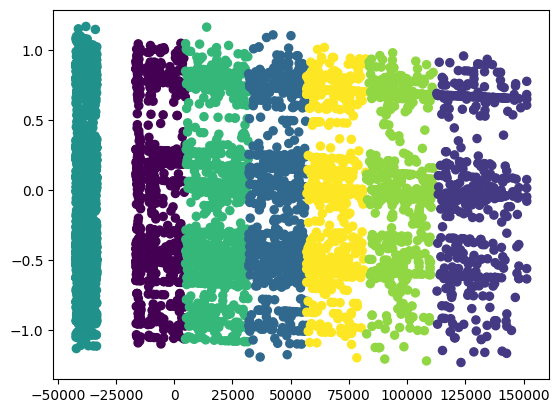

In [113]:
plt.scatter(first_component, second_component, s = 34, c = KM.labels_)

In [114]:
KM.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [115]:
movie

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
movie["Cluster"] = KM.labels_ 

In [117]:
movie.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Cluster
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,3
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [120]:
movie[movie.Cluster == 3]

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Cluster
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,3
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,9004,D.A.R.Y.L. (1985),0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
5397,9005,Fire in the Sky (1993),0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,3
5398,9008,"Invisible Man Returns, The (1940)",0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,3
5399,9010,Love Me If You Dare (Jeux d'enfants) (2003),0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,3


In [135]:
def movie_recommender(movie_name):
    movie_title = movie[movie["title"] == movie_name]
    cluster = movie_title.iloc[0]["Cluster"]
    print(cluster)
    recommend = movie[movie["Cluster"] == cluster]
    return(recommend)
    

In [136]:
movie_recommender("Control Room (2004)")

3


,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Cluster
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,3
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,9004,D.A.R.Y.L. (1985),0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
5397,9005,Fire in the Sky (1993),0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,3
5398,9008,"Invisible Man Returns, The (1940)",0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,3
5399,9010,Love Me If You Dare (Jeux d'enfants) (2003),0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,3
